In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage.filters import gaussian_filter

In [2]:
pixels = 128
photons = 5
QE = 0.9
seed = 42
rs = np.random.RandomState(seed)

image = np.zeros((124, 124))
photonImage = np.zeros((124, 124))

In [3]:
def gaus(x, a, m, s):
    return np.sqrt(a)*np.exp(-(x-m)**2/(2*s**2))                            

xx, yy = np.meshgrid(np.arange(128), np.arange(128))
gaus2d = gaus(xx, 3, 64, 10)*gaus(yy, 3, 64, 10)

In [4]:
x = np.arange(1000)

def gain(x): 
    return np.exp(-0.009*x)

gain = gain(x)

def zero(x):
    return np.zeros(1000)

zero = zero(x)
noElectrons = zero[0]
ElectronsOut = random.choice(list(enumerate(gain)))
electronsGained = (ElectronsOut[0])

print(ElectronsOut)

#def EMGain(numElectrons):
 #   if numElectrons == 0:
  #      ElectronsOut = random.choice(list(enumerate(zero)))
     #elif numElectrons > 0:
      #  ElectronsOut = random.choice(list(enumerate(gain)))
        
   # return ElectronsOut[0]

(53, 0.6206425292934373)


In [5]:
def Blur(image, sigma):
    return gaussian_filter(image, sigma=3)

In [6]:
for rowi, row in enumerate(image):
    for coli, col in enumerate(row):
        meanIntensity = gaus2d[rowi, coli]
        shotnoise = rs.poisson(meanIntensity)
        blurred = Blur(photonImage, sigma=2)
        photonImage[rowi, coli] += shotnoise
        
for rowi, row in enumerate(image):
    for coli, col in enumerate(row):
        numPhotons = photonImage[rowi, coli]
        numElectrons = numPhotons*QE
        
        if numElectrons == 0:
            electronsGained = 0
        elif numElectrons > 0:
            ElectronsOut = random.choice(list(enumerate(gain)))
            electronsGained = ElectronsOut[0]
     
        image[rowi, coli] += electronsGained

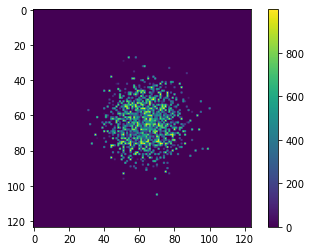

In [7]:
plt.imshow(image)
plt.colorbar()

In [8]:
print(meanIntensity)

2.287337971616916e-15


In [9]:
meanIntensity.shape

()